# Predicting Loan Eligibility


## 1. Introduction

A bank seeks to improve it's loan approval process. It is possible to use the bank's existing customer data to train a machine learning model to identify whether or not a new customer will be elligible to recieve a loan. This will allow the bank to allocate time and resources to other tasks.
    
As we will see when we examine the data below, the target variable we will be predicting (Loan Status) is a binary yes/no variable, therefore we will train classification models to make predictions. I will train the following models and then compare their accuracy: Logistic Regression Classifier, Decision Tree Classifier, Random Forest Classifier, K Nearest Neighbours Classifier, Gradient Boosting Classifier.

    


## 2. Data

For this project I am using a dataset downloaded from Kaggle. It consists of two separate CSV files; one dataset for training the models, with 13 columns and 614 rows, and another dataset for testing the models, with 12 columns (absent the target variable) and 367 rows.

The full list of features, explored futher in the next sections, is as follows:

- Loan_ID: A unique identifier for each loan application
- Gender: A binary categorical variable indicating if the applicant is male or female.
- Married: A yes/no categorical variable indicating if the applicant is married or not.
- Dependents: Indicates the number of dependents of the applicant. May be 0, 1, 2, or 3+. 
- Education: A binary category indicating if the applicant is a university graduate or not.
- Self_Employed: A yes/no categorical variable indicating if the applicant is self employed.
- ApplicantIncome: A numerical variable representing the applicant's monthly income. 
- CoapplicantIncome: A numerical variable representing the co-applicant's monthly income.
- LoanAmount: A numerical variable representing the value of the prospective loan in 1000s. 
- Loan_Amount_Term: This variable indicates the repayment period of the prospective loan in number of months.
- Credit_History: A 1/0 binary variable indicating whether the applicant has good (1) or bad (0) credit history.
- Property_Area: a categorical variable roughly describing the area where the applicant resides. May be rural, urban, or semi-urban.
- Loan_Status: The target variable. A yes/no categorical variable indicating whether the loan was approved or not.


In [1]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import plotly.express as px

print("done")

done


In [2]:
#read in data

df_loan_test = pd.read_csv(r'C:\Users\Invitado\Desktop\loan_data\loan-test.csv')
df_loan_train = pd.read_csv(r'C:\Users\Invitado\Desktop\loan_data\loan-train.csv')
print('done')

done


In [3]:
df_loan_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [4]:
df_loan_test.shape

(367, 12)

In [5]:
df_loan_test.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [6]:
df_loan_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
df_loan_train.shape

(614, 13)

In [8]:
df_loan_train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

## 3. Exploratory Analysis

In [9]:
#change Loan Status to binary numeric value
df_loan_train.Loan_Status = df_loan_train.Loan_Status.map({'Y':1, 'N':0})

df_loan_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [10]:
df_loan_train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int64
dtype: object

In [11]:
#number of rows with null values
df_loan_train.isnull().any(axis=1).sum()

134

In [12]:
#Total number of cells with missing data
df_loan_train.isnull().sum().sum()

149

In [13]:
#number of cells with null values by column
df_loan_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
#number of rows with null values
df_loan_test.isnull().any(axis=1).sum()

78

In [15]:
#number of cells with null values by column
df_loan_test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [16]:
#Total number of cells with missing data
df_loan_test.isnull().sum().sum()

84

The dataset is relatively small, the train split consisting of only 613 rows. There are 134 rows with missing data; this represents a significant amount of training data, therefore it is better to fill in the missing data rather than drop the rows completely. It doesn't seem that any one column has enough missing values to discard it, either. We will deal with these missing values after doing the exploratory analysis.

In [17]:
df_loan_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199,0.687296
std,6109.041673,2926.248369,85.587325,65.12041,0.364878,0.463973
min,150.000000,0.000000,9.000000,12.00000,0.000000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000,0.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,1.000000


### 3.1 Univariate Analysis

### Categorical Variables

#### Loan ID
As this column is only a unique identifier for each entry, we will ignore for the purposes of analysis.

#### Gender

In [18]:
df_loan_train['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

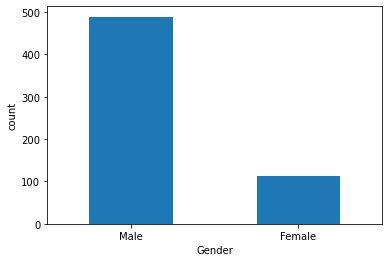

In [19]:
df_loan_train['Gender'].value_counts().plot(kind='bar', xlabel = 'Gender', ylabel = 'count', rot = 0)

#### Marital Status

In [20]:
df_loan_train['Married'].value_counts(dropna=False)

Yes    398
No     213
NaN      3
Name: Married, dtype: int64

<AxesSubplot:xlabel='Married', ylabel='count'>

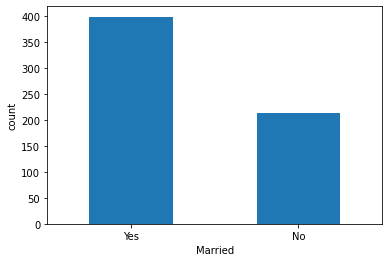

In [21]:
df_loan_train['Married'].value_counts().plot(kind='bar', xlabel = 'Married', ylabel = 'count', rot = 0)

#### Dependents

In [22]:
df_loan_train['Dependents'].value_counts(dropna=False)

0      345
1      102
2      101
3+      51
NaN     15
Name: Dependents, dtype: int64

<AxesSubplot:xlabel='Number of Dependents', ylabel='count'>

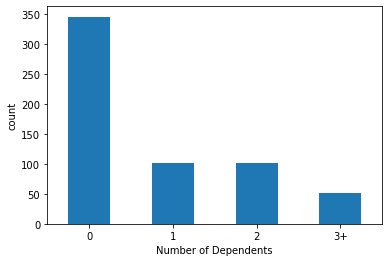

In [23]:
df_loan_train['Dependents'].value_counts().plot(kind='bar', xlabel = 'Number of Dependents', ylabel = 'count', rot = 0)

#### Education

In [24]:
df_loan_train['Education'].value_counts(dropna=False)

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

<AxesSubplot:xlabel='Education', ylabel='count'>

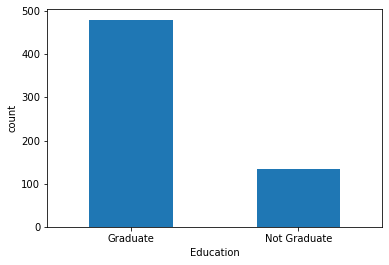

In [25]:
df_loan_train['Education'].value_counts().plot(kind='bar', xlabel = 'Education', ylabel = 'count', rot = 0)

#### Self Employed

In [26]:
df_loan_train['Self_Employed'].value_counts(dropna=False)

No     500
Yes     82
NaN     32
Name: Self_Employed, dtype: int64

<AxesSubplot:xlabel='Self Employed', ylabel='count'>

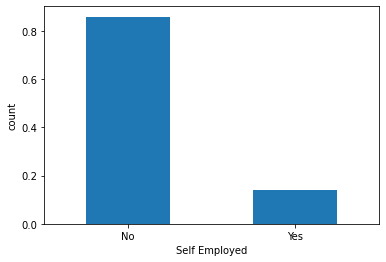

In [27]:
df_loan_train['Self_Employed'].value_counts(normalize =True).plot(kind='bar', xlabel = 'Self Employed', ylabel = 'count', rot = 0)

#### Credit History

In [28]:
df_loan_train['Credit_History'].value_counts(dropna=False)

1.0    475
0.0     89
NaN     50
Name: Credit_History, dtype: int64

<AxesSubplot:xlabel='Credit History', ylabel='count'>

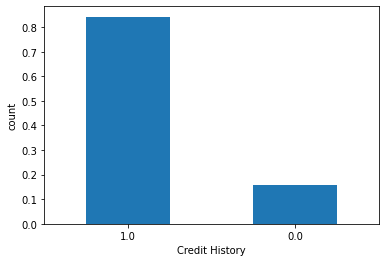

In [29]:
df_loan_train['Credit_History'].value_counts(normalize = True).plot(kind='bar', xlabel = 'Credit History', ylabel = 'count', rot = 0)

#### Property Area

In [30]:
df_loan_train['Property_Area'].value_counts(dropna=False)

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

<AxesSubplot:xlabel='Property Area', ylabel='count'>

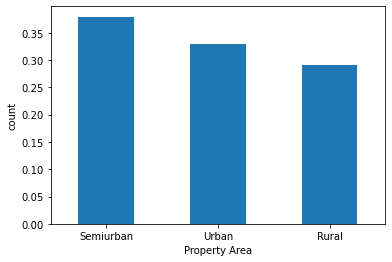

In [31]:
df_loan_train['Property_Area'].value_counts(normalize =True).plot(kind='bar', xlabel = 'Property Area', ylabel = 'count', rot = 0)

#### Loan Approval Status

In [32]:
df_loan_train['Loan_Status'].value_counts(dropna=False)

1    422
0    192
Name: Loan_Status, dtype: int64

<AxesSubplot:xlabel='Loan Approval Status', ylabel='count'>

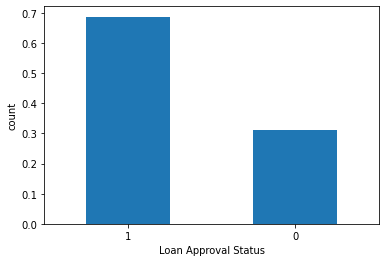

In [33]:
df_loan_train['Loan_Status'].value_counts(normalize = True).plot(kind='bar', xlabel = 'Loan Approval Status', ylabel = 'count', rot = 0)

#### Observations

In this dataset, a majority of loan applicants are: 
- Male
- Married
- Graduates
- Not self-employed
- Have good credit history
- Have no dependents

### Numerical Variables

In [34]:
import seaborn as sns

#### Applicant Income

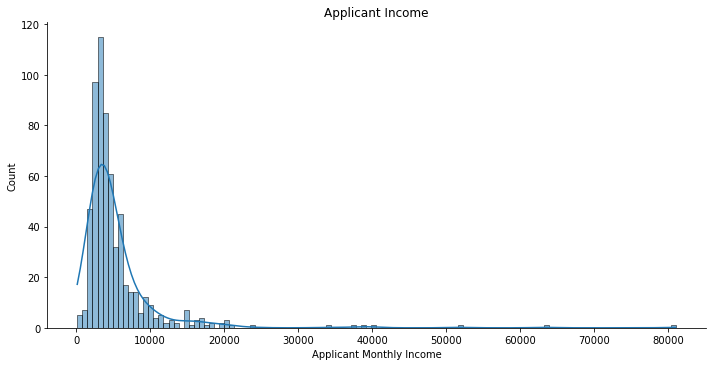

In [35]:
sns.displot(df_loan_train['ApplicantIncome'], height = 5, aspect = 2, kde=True)
plt.title('Applicant Income')
plt.xlabel('Applicant Monthly Income')
plt.show()

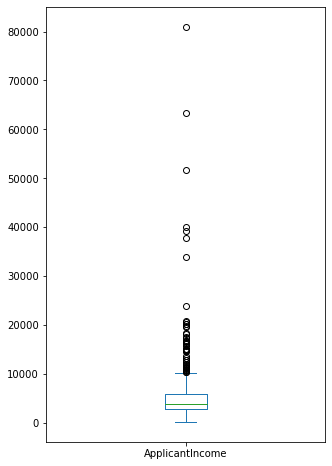

In [36]:
df_loan_train['ApplicantIncome'].plot.box(figsize = (5, 8))
plt.show()

#### Co-Applicant Income

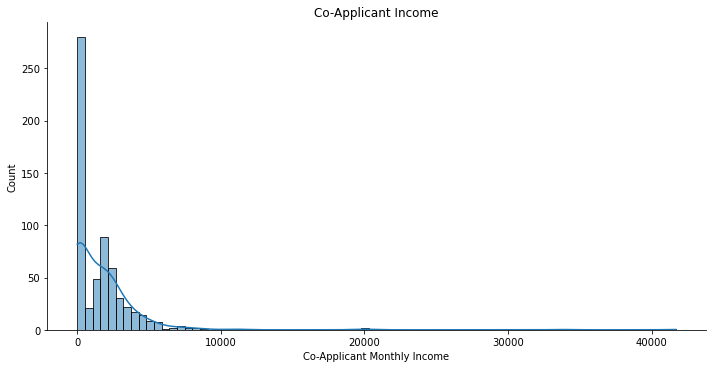

In [37]:
sns.displot(df_loan_train['CoapplicantIncome'], height = 5, aspect = 2, kde=True)
plt.title('Co-Applicant Income')
plt.xlabel('Co-Applicant Monthly Income')
plt.show()

Here we can see that in the mjority of cases, the co-applicant income is 0.

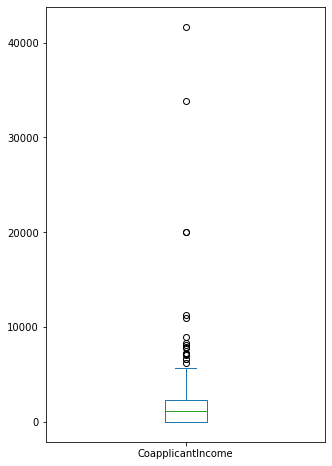

In [38]:
df_loan_train['CoapplicantIncome'].plot.box(figsize = (5, 8))
plt.show()

#### Loan Amount

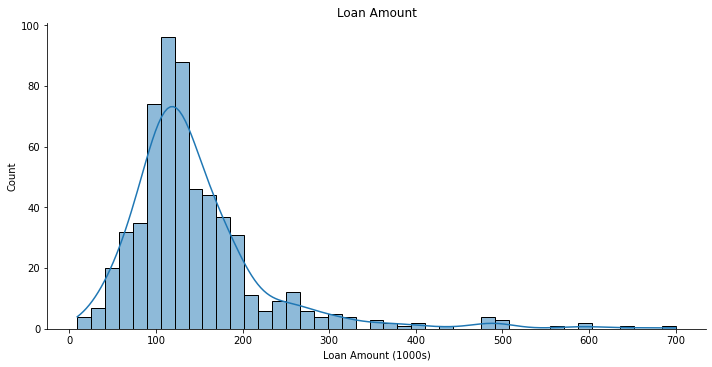

In [39]:
sns.displot(df_loan_train['LoanAmount'], height = 5, aspect = 2, kde=True)
plt.title('Loan Amount')
plt.xlabel('Loan Amount (1000s)')
plt.show()

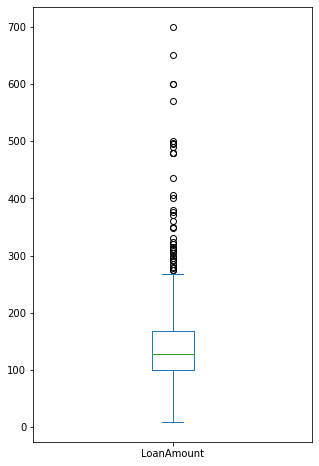

In [40]:
df_loan_train['LoanAmount'].plot.box(figsize = (5, 8))
plt.show()

#### Loan Amount Term

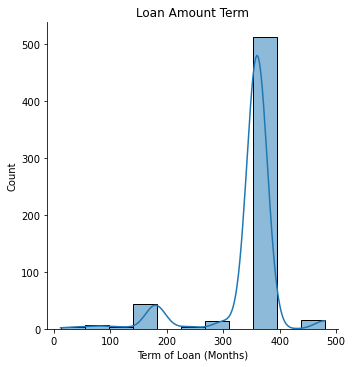

In [41]:
sns.displot(df_loan_train['Loan_Amount_Term'], height = 5, aspect = 1, kde=True)
plt.title('Loan Amount Term')
plt.xlabel('Term of Loan (Months)')
plt.show()

In [42]:
df_loan_train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In the vast majority of cases, the loan amount term is 360 months, or 30 years.

### 3.2 Bivariate Analysis

#### Applicant Income V. Education

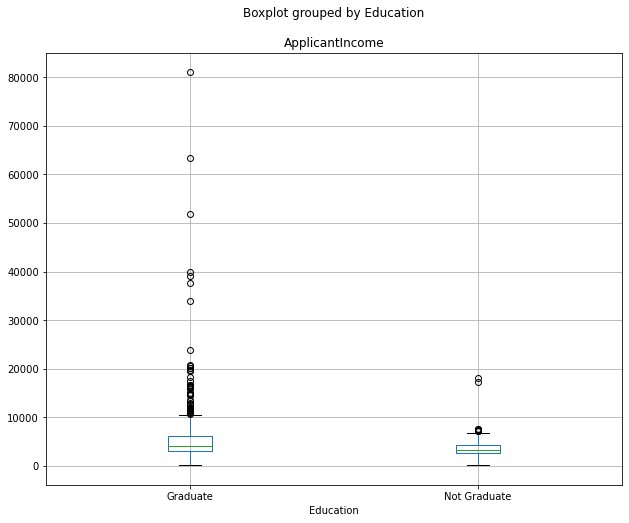

In [43]:
df_loan_train.boxplot(column='ApplicantIncome', by = 'Education', figsize = (10, 8)) 
plt.show()

Individuals with an education level of 'Graduate' are more likely to have a higher income than non-graduates.

#### Education V. Loan Amount

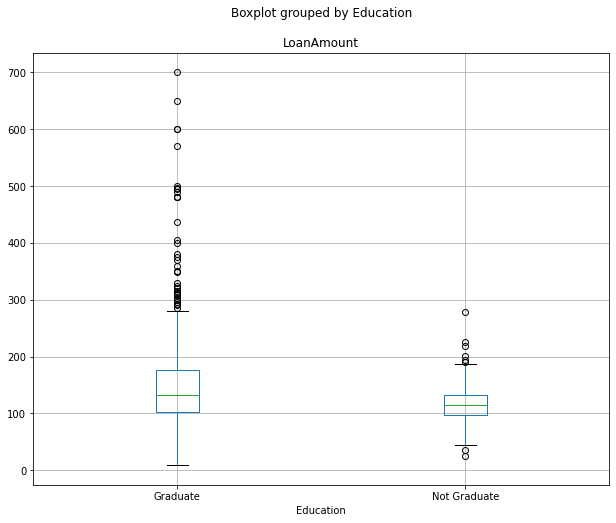

In [44]:
df_loan_train.boxplot(column='LoanAmount', by = 'Education', figsize = (10, 8)) 
plt.show()

Individuals in the 'Graduate' category request loans of higher values than non-graduates.

#### Loan Status V. Gender

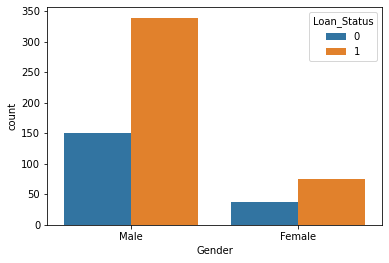

In [45]:
sns.countplot(data = df_loan_train, x='Gender', hue="Loan_Status")
plt.show()

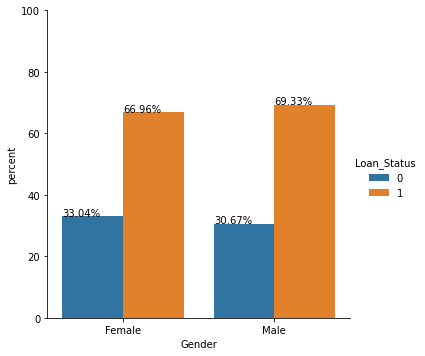

In [46]:
x,y = 'Gender', 'Loan_Status'

gen = df_loan_train.groupby(x)[y].value_counts(normalize=True)
gen = gen.mul(100)
gen = gen.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=gen)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

There is a difference of a few percent in favour of men to have a positive loan status.

#### Gender V. Education

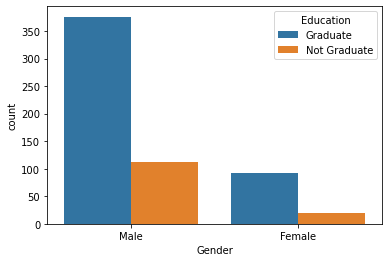

In [47]:
sns.countplot(data = df_loan_train, x='Gender', hue="Education")
plt.show()

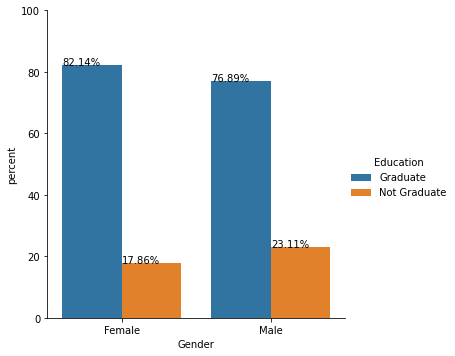

In [48]:
x,y = 'Gender', 'Education'

gen_ed = df_loan_train.groupby(x)[y].value_counts(normalize=True)
gen_ed = gen_ed.mul(100)
gen_ed = gen_ed.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=gen_ed)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

At least among our sample of loan applicants, women are slightly more likely than men to belong to the 'Graduate' category. 

#### Gender V. Applicant Income

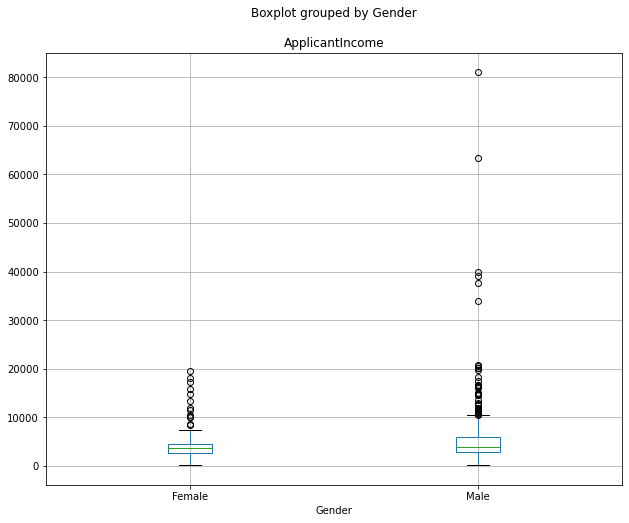

In [49]:
df_loan_train.boxplot(column='ApplicantIncome', by = 'Gender', figsize = (10, 8)) 
plt.show()

#### Gender V. Married

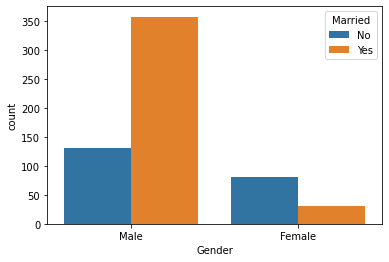

In [50]:
sns.countplot(data = df_loan_train, x='Gender', hue="Married")
plt.show()

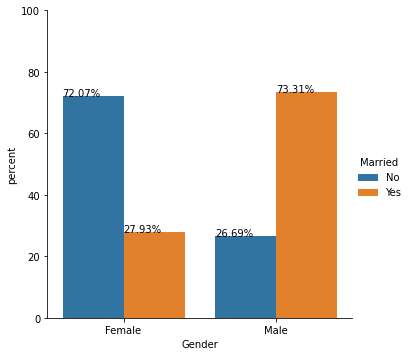

In [51]:
x,y = 'Gender', 'Married'

gen_mar = df_loan_train.groupby(x)[y].value_counts(normalize=True)
gen_mar = gen_mar.mul(100)
gen_mar = gen_mar.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=gen_mar)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

Male loan applicants are much more likely to be married than female applicants

#### Loan Status V. Education

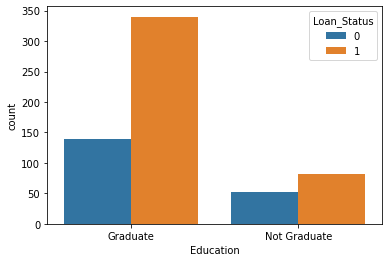

In [52]:
sns.countplot(data = df_loan_train, x='Education', hue="Loan_Status")
plt.show()

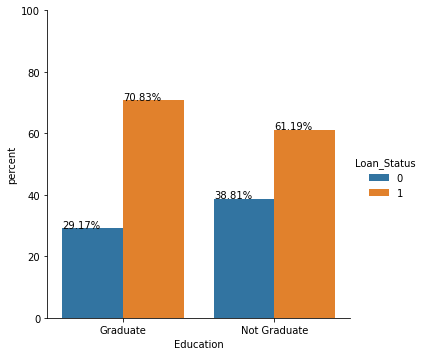

In [53]:
x,y = 'Education', 'Loan_Status'

ed = df_loan_train.groupby(x)[y].value_counts(normalize=True)
ed = ed.mul(100)
ed = ed.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=ed)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

Graduates are more likely than non-graduates to have a positive loan status

#### Credit History V. Education

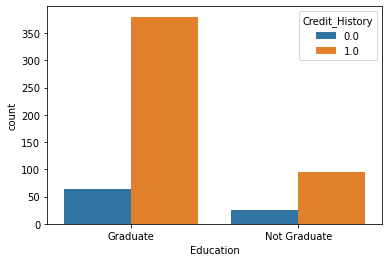

In [54]:
sns.countplot(data = df_loan_train, x='Education', hue="Credit_History")
plt.show()

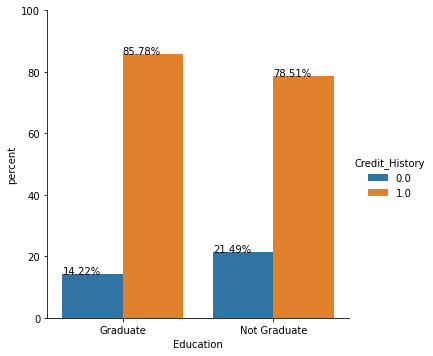

In [55]:
x,y = 'Education', 'Credit_History'

ed_cred = df_loan_train.groupby(x)[y].value_counts(normalize=True)
ed_cred = ed_cred.mul(100)
ed_cred = ed_cred.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=ed_cred)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

Graduates are slightly more likely to have good credit history than non-graduates.

#### Loan Status V. Credit History

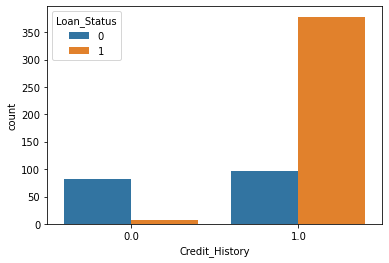

In [56]:
sns.countplot(data = df_loan_train, x='Credit_History', hue="Loan_Status")
plt.show()

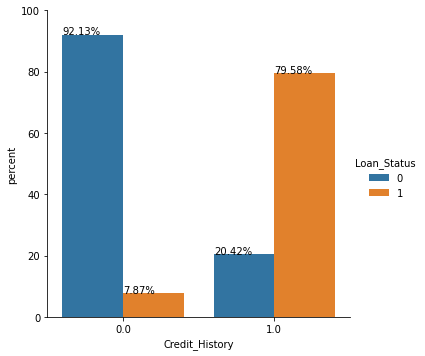

In [57]:
x,y = 'Credit_History', 'Loan_Status'

cred = df_loan_train.groupby(x)[y].value_counts(normalize=True)
cred = cred.mul(100)
cred = cred.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=cred)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

From this, we can see clearly that having good credit history figures significantly in positive loan status. 

#### Loan Status V. Self-Employed

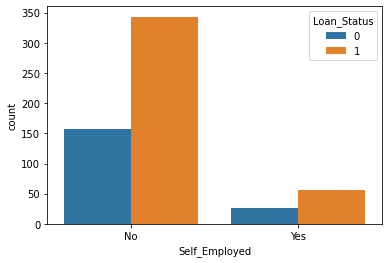

In [58]:
sns.countplot(data = df_loan_train, x='Self_Employed', hue="Loan_Status")
plt.show()

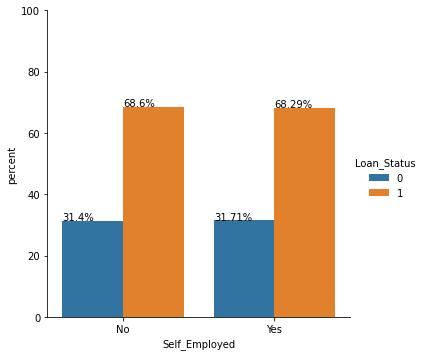

In [59]:
x,y = 'Self_Employed', 'Loan_Status'

emp = df_loan_train.groupby(x)[y].value_counts(normalize=True)
emp = emp.mul(100)
emp = emp.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=emp)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

There is effectively no difference in loan status for this category.

#### Loan Status V. Married

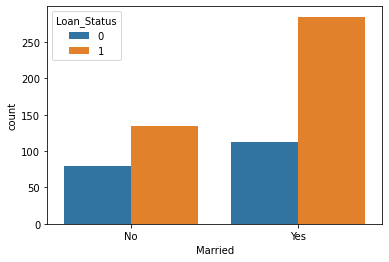

In [60]:
sns.countplot(data = df_loan_train, x='Married', hue="Loan_Status")
plt.show()

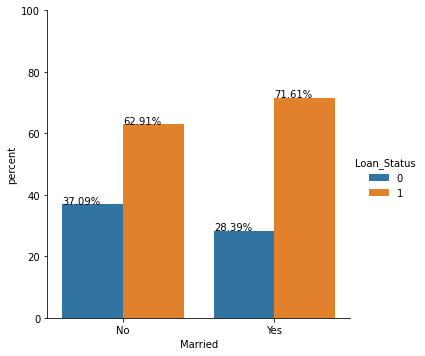

In [61]:
x,y = 'Married', 'Loan_Status'

mar = df_loan_train.groupby(x)[y].value_counts(normalize=True)
mar = mar.mul(100)
mar = mar.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=mar)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

Married applicants are slightly more likely to have their loans approved.

#### Loan Status V. Property Area

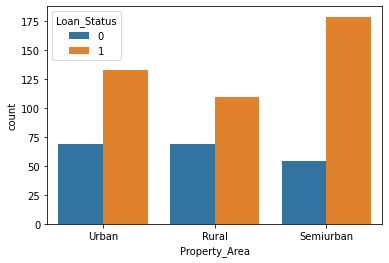

In [62]:
sns.countplot(data = df_loan_train, x='Property_Area', hue="Loan_Status")
plt.show()

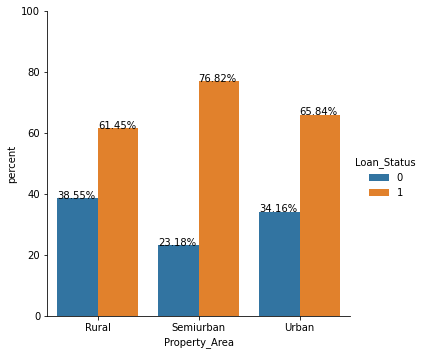

In [63]:
x,y = 'Property_Area', 'Loan_Status'

prop = df_loan_train.groupby(x)[y].value_counts(normalize=True)
prop = prop.mul(100)
prop = prop.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=prop)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

Applicants in Semiurban areas are more likely than other applicants to have their loans approved, however I am skeptical that this category has a causal effect on loan status.

#### Loan Status V. Dependents

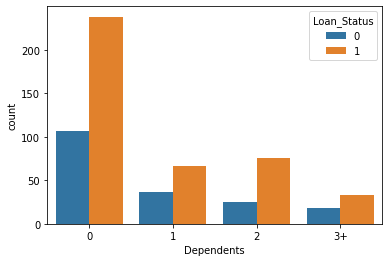

In [64]:
sns.countplot(data = df_loan_train, x='Dependents', hue="Loan_Status")
plt.show()

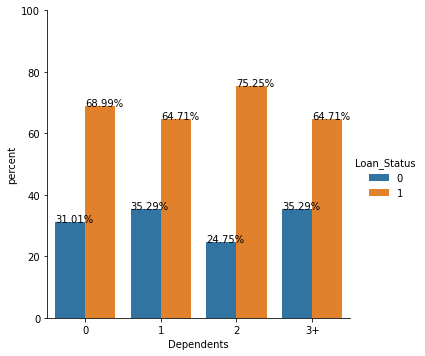

In [65]:
x,y = 'Dependents', 'Loan_Status'

dep = df_loan_train.groupby(x)[y].value_counts(normalize=True)
dep = dep.mul(100)
dep = dep.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=dep)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

The majority of applicants have no dependents. After normalizing the data, we can see the group with 2 dependents has the best chance of receiving a positive loan status. 

#### Dependents V. Education

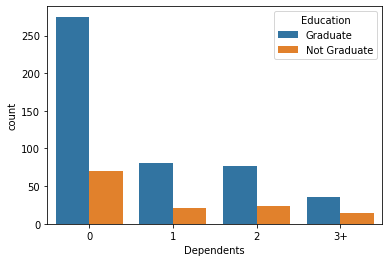

In [66]:
sns.countplot(data = df_loan_train, x='Dependents', hue="Education")
plt.show()

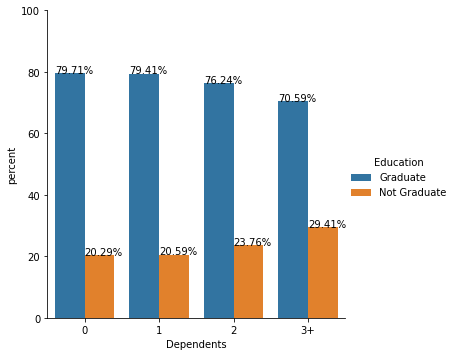

In [67]:
x,y = 'Dependents', 'Education'

dep_ed = df_loan_train.groupby(x)[y].value_counts(normalize=True)
dep_ed = dep_ed.mul(100)
dep_ed = dep_ed.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=dep_ed)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

From our sample of loan applicants, the majority who are graduates have no dependents. However differences decrease after normalizing the data.

#### Dependents V. Marital Status

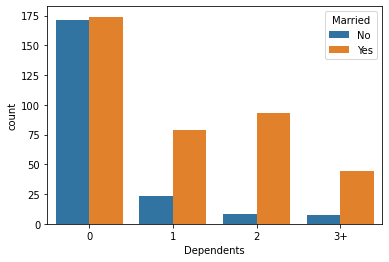

In [68]:
sns.countplot(data = df_loan_train, x='Dependents', hue="Married")
plt.show()

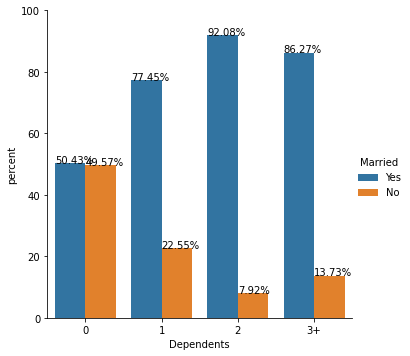

In [69]:
x,y = 'Dependents', 'Married'

dep_mar = df_loan_train.groupby(x)[y].value_counts(normalize=True)
dep_mar = dep_mar.mul(100)
dep_mar = dep_mar.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=dep_mar)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

An unsurprising result, people with dependents are much more likely to be married.

#### Self-Employed V. Credit History

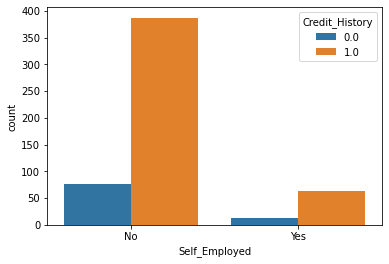

In [70]:
sns.countplot(data = df_loan_train, x='Self_Employed', hue="Credit_History")
plt.show()

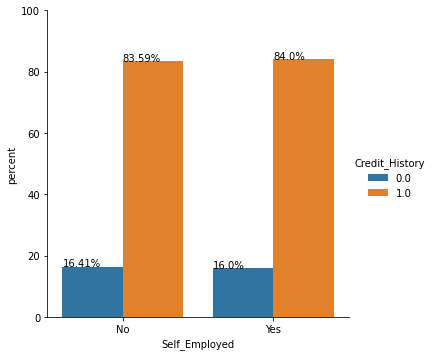

In [71]:
x,y = 'Self_Employed', 'Credit_History'

emp_cred = df_loan_train.groupby(x)[y].value_counts(normalize=True)
emp_cred = emp_cred.mul(100)
emp_cred = emp_cred.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=emp_cred)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

After Normalizing the data, there is effectively no difference between the self-employed and not self-employed groups regarding credit history.

#### Loan Status V. Applicant Income

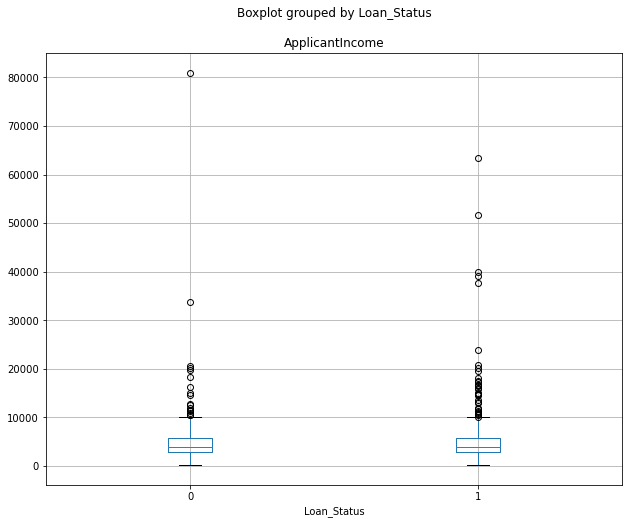

In [72]:
df_loan_train.boxplot(column='ApplicantIncome', by = 'Loan_Status', figsize = (10, 8)) 
plt.show()

The biggest difference here seems to be the outliers. The boxplots show that for the majority portion of the data, the level of income is very similar whether loan status is 'yes' or 'no'.

#### Loan Status V. Co-Applicant Income

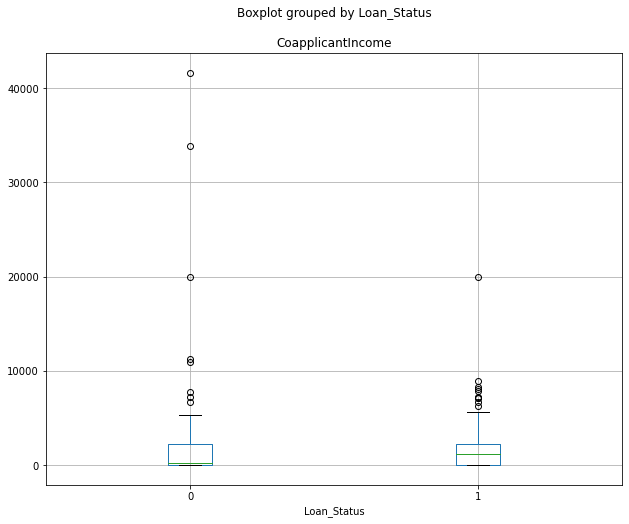

In [73]:
df_loan_train.boxplot(column='CoapplicantIncome', by = 'Loan_Status', figsize = (10, 8)) 
plt.show()

The green line in the box representing the median is higher in cases with a 'yes' loan status. The whisker for the upper quartile also appears to be slightly higher.

#### Loan Status V. Loan Amount

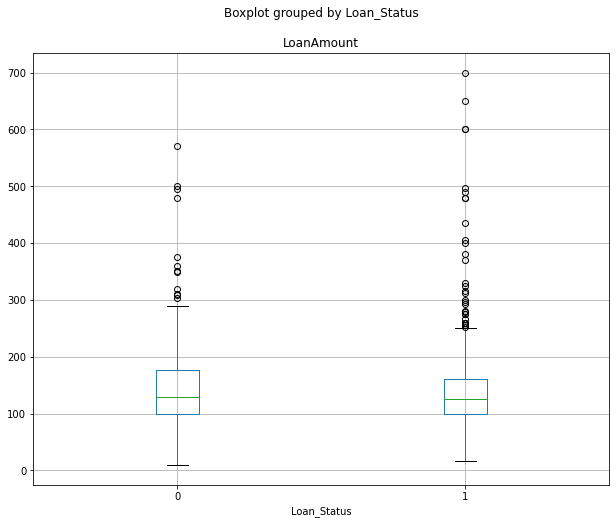

In [74]:
df_loan_train.boxplot(column='LoanAmount', by = 'Loan_Status', figsize = (10, 8)) 
plt.show()

In the main portion of the data, cases with positive loan status have a slightly lower median value and lower upper value, though there are more outliers representing very high loan amounts.

<AxesSubplot:>

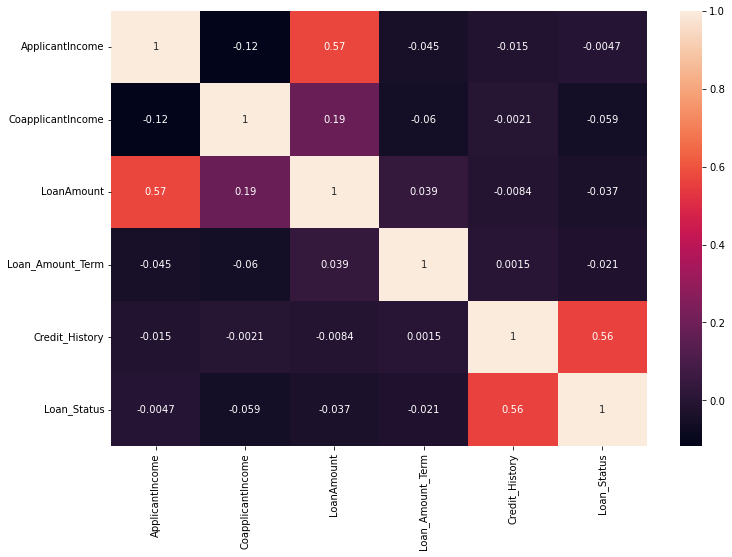

In [75]:
plt.figure(figsize = (12, 8))
sns.heatmap(df_loan_train.corr(), annot=True)

We can see in the heatmap the strongest correlation between Loan Amount and Applicant Income. There is also a strong correlation again between Credit History and Loan Status.

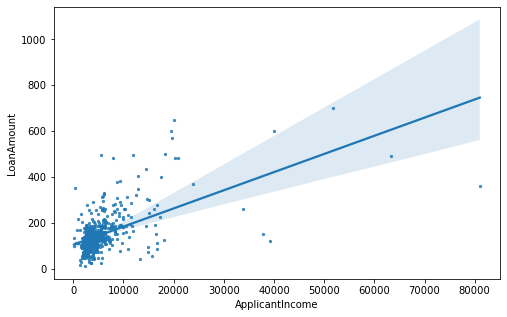

In [76]:
plt.figure(figsize = (8, 5))
sns.regplot(data= df_loan_train, x='ApplicantIncome', y='LoanAmount', scatter_kws={'s':5})
plt.show()

While there is a positive relationship between applicant income and loan amount, there are many outliers, and the majority of data points form more of a blob than something obviously linear.

#### Comparing mean and median of some numerical values and their relationship to Loan Status

<AxesSubplot:xlabel='Loan_Status'>

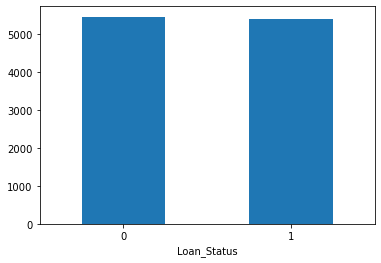

In [77]:
df_loan_train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar(rot=0)

<AxesSubplot:xlabel='Loan_Status'>

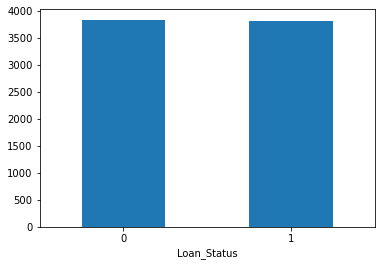

In [78]:
df_loan_train.groupby('Loan_Status')['ApplicantIncome'].median().plot.bar(rot=0)

From the above two plots, comparing the mean and median income of applicants with a positive loan status, and the mean and median income of applicants with a negative status, we can see there is little to no difference. It does not seem that applicant income has a significant effect on the target variable. The heat map also shows little correlation between applicant income and loan status.

<AxesSubplot:xlabel='Loan_Status'>

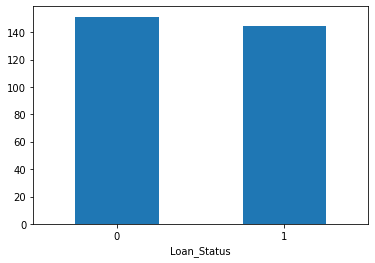

In [79]:
df_loan_train.groupby('Loan_Status')['LoanAmount'].mean().plot.bar(rot=0)

<AxesSubplot:xlabel='Loan_Status'>

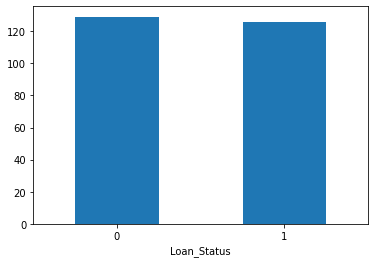

In [80]:
df_loan_train.groupby('Loan_Status')['LoanAmount'].median().plot.bar(rot=0)

<AxesSubplot:xlabel='Loan_Status'>

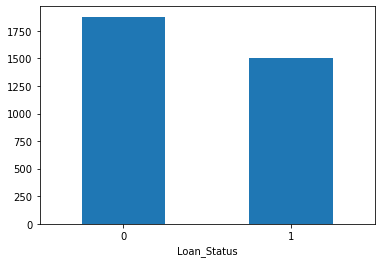

In [81]:
df_loan_train.groupby('Loan_Status')['CoapplicantIncome'].mean().plot.bar(rot=0)

<AxesSubplot:xlabel='Loan_Status'>

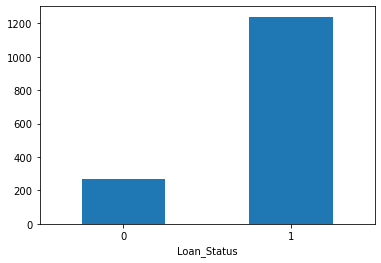

In [82]:
df_loan_train.groupby('Loan_Status')['CoapplicantIncome'].median().plot.bar(rot=0)

Here we can see a more clear illustration of the difference in median co-applicant income in relation to loan status that we have observed in the boxplot. It appears that a higher median co-applicant income is more likely to result in a positive loan status.

### Summary

This section should illustrate the importance of normalizing data. Looking only at absolute values may give a false impression of the significance of a particular variable. For example, when looking at the relationship between education level and loan status, the un-normalized values make it appear that that graduates are very substatially more likely to be approved for a loan than non-graduates; however, it only appears this way because graduates are more prevalent in the data than non-graduates. Normalizing the data shows a much less pronounced difference between these groups. 

#### Observations
- Credit History appears to be highly correlated with positive loan status
- Married people are more likely to have their loan approved
- There is a moderate correlation between sex and marital status: Male loan applicants are more likely than female applicants to be married.
- Graduates are more likely to have a higher income than non-graduates.
- Women are slightly more likely to be graduates than men, however, men on average have a higher income.


## 4. Data Preprocessing

#### Handling Missing Values

For categarical variables we will fill in missing data with the mode.
Loan Amount is the only numerical variable with missing values. As the boxplot showed, it has a number of outliers which will skew the mean; therefore we will use the median to fill the missing data. 

In [83]:
df_loan_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [84]:
#Drop Loan_ID column
df_loan_train = df_loan_train.drop(['Loan_ID'], axis=1)

In [85]:
#Imputing mode values in categorical variable columns
df_loan_train['Gender'].fillna(df_loan_train['Gender'].mode()[0], inplace=True),
df_loan_train['Married'].fillna(df_loan_train['Married'].mode()[0], inplace=True),
df_loan_train['Dependents'].fillna(df_loan_train['Dependents'].mode()[0], inplace=True),
df_loan_train['Self_Employed'].fillna(df_loan_train['Self_Employed'].mode()[0], inplace=True),
df_loan_train['Credit_History'].fillna(df_loan_train['Credit_History'].mode()[0], inplace=True),
df_loan_train['Loan_Amount_Term'].fillna(df_loan_train['Loan_Amount_Term'].mode()[0], inplace=True)

#Imputing median value in LoanAmount column
df_loan_train['LoanAmount'].fillna(df_loan_train['LoanAmount'].median(), inplace=True)

In [86]:
df_loan_train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

We will repeat this process for the test set

In [87]:
df_loan_test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [88]:
df_loan_test = df_loan_test.drop(['Loan_ID'], axis = 1)

In [89]:
#Imputing mode values in categorical variable columns
df_loan_test['Gender'].fillna(df_loan_test['Gender'].mode()[0], inplace=True),
df_loan_test['Dependents'].fillna(df_loan_test['Dependents'].mode()[0], inplace=True),
df_loan_test['Self_Employed'].fillna(df_loan_test['Self_Employed'].mode()[0], inplace=True),
df_loan_test['Credit_History'].fillna(df_loan_test['Credit_History'].mode()[0], inplace=True),
df_loan_test['Loan_Amount_Term'].fillna(df_loan_test['Loan_Amount_Term'].mode()[0], inplace=True)

#Imputing median value in LoanAmount column
df_loan_test['LoanAmount'].fillna(df_loan_test['LoanAmount'].median(), inplace=True)

In [90]:
df_loan_test.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

#### Handling Outliers

The data in our numerical columns contain many outliers and does not fit a normal distribution. To facilitate analysis, we will perform transformations to better fit a normal distribution.

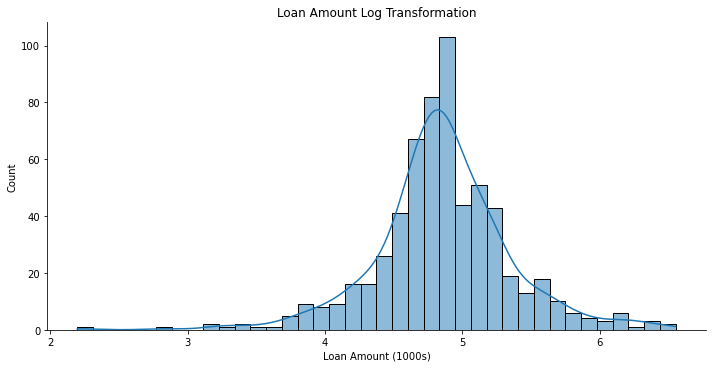

In [91]:
df_loan_train['LoanAmount']=np.log(df_loan_train['LoanAmount'])

sns.displot(df_loan_train['LoanAmount'], height = 5, aspect = 2, kde=True)
plt.title('Loan Amount Log Transformation')
plt.xlabel('Loan Amount (1000s)')
plt.show()

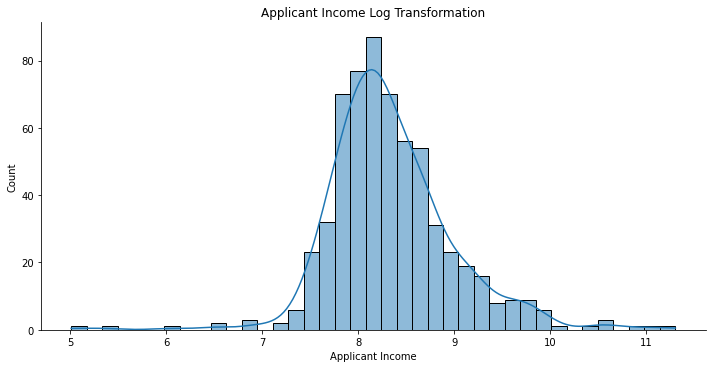

In [92]:
df_loan_train['ApplicantIncome']=np.log(df_loan_train['ApplicantIncome'])

sns.displot(df_loan_train['ApplicantIncome'], height = 5, aspect = 2, kde=True)
plt.title('Applicant Income Log Transformation')
plt.xlabel('Applicant Income')
plt.show()

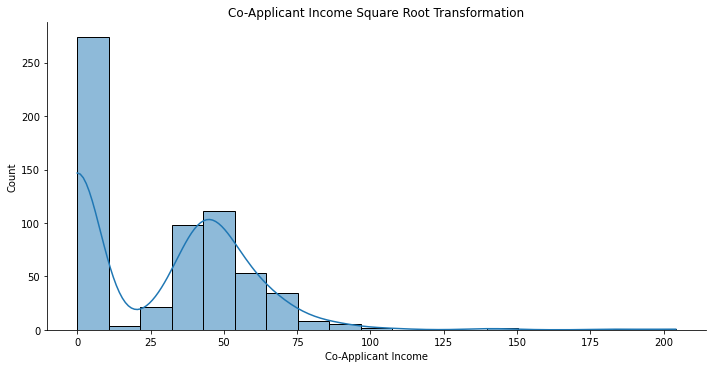

In [93]:
df_loan_train['CoapplicantIncome']=np.sqrt(df_loan_train['CoapplicantIncome'])

sns.displot(df_loan_train['CoapplicantIncome'], height = 5, aspect = 2, kde=True)
plt.title('Co-Applicant Income Square Root Transformation')
plt.xlabel('Co-Applicant Income')
plt.show()

A significant portion of the data has Co-applicant income as 0, therefore logarithmic transformation is not the appropriate method. 

#### One-Hot Encoding

We will need to perform one-hot encoding on the categorical variables before modelling.

In [94]:
df_train_onehot = pd.get_dummies(df_loan_train)
df_train_onehot.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,8.674026,0.000000,4.852030,360.0,1.0,1,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1
1,8.430109,38.832976,4.852030,360.0,1.0,0,0,1,0,1,...,1,0,0,1,0,1,0,1,0,0
2,8.006368,0.000000,4.189655,360.0,1.0,1,0,1,0,1,...,0,0,0,1,0,0,1,0,0,1
3,7.856707,48.559242,4.787492,360.0,1.0,1,0,1,0,1,...,0,0,0,0,1,1,0,0,0,1
4,8.699515,0.000000,4.948760,360.0,1.0,1,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1


Again we will repeat this process for the test set

In [95]:
df_test_onehot = pd.get_dummies(df_loan_test)
df_test_onehot.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5720,0,110.0,360.0,1.0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
1,3076,1500,126.0,360.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
2,5000,1800,208.0,360.0,1.0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
3,2340,2546,100.0,360.0,1.0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
4,3276,0,78.0,360.0,1.0,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1


## 5. Modelling

Now we will train several different machine learning classification models and compare their results.

First we must separate the target variable from the dataset.

In [96]:
X = df_train_onehot.drop(['Loan_Status'], axis = 1)
y = df_train_onehot['Loan_Status']
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

#### Scaling

In order to make the data more interpretable by the machine learning models, we will scale the data, transforming each feature so that it fits within a given range, to facilitate model training.  

In [97]:

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

#### SMOTE (Synthetic Minority Oversampling Technique)

As we have a classification problem in which there is an imbalance in the target variable, we can try to address this imbalance using SMOTE to synthesize new examples of the minority class. In other words, the SMOTE technique will make it so there are an equal number of cases where Loan Status is 'approved' and 'not approved' to produce better-fit models.  

In [98]:
!pip install imbalanced-learn
import imblearn
from imblearn.over_sampling import SMOTE

In [99]:
X, y = SMOTE().fit_resample(X, y)

Next we will split the data into sets for training and validating the models.

In [100]:
#Train/Test Split

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state = 0)

In [101]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

#### Logistic Regression Model

In [102]:
from sklearn.linear_model import LogisticRegression

LR_loan = LogisticRegression(solver= 'saga', max_iter=250, random_state = 1)
LR_loan.fit(X_train, y_train)
LR_pred = LR_loan.predict(X_val)

In [103]:
LR_loan.intercept_

array([-2.48639812])

In [104]:
coefs = LR_loan.coef_
print('Model Coefficients:', coefs)

Model Coefficients: [[-0.08799611 -0.01218326 -0.34280044 -0.61401678  3.70702537  0.04707234
  -0.06772069 -0.30984223  0.28919388  0.04173665 -0.37858728  0.24151129
   0.07469099  0.13012361 -0.15077196  0.00875464 -0.02940299 -0.5442201
   0.54311087 -0.01953912]]


In [105]:
LR_mse = mean_squared_error(LR_pred, y_val)
print("mean squared error:", LR_mse)

mean squared error: 0.27218934911242604


In [106]:
LR_mae = mean_absolute_error(LR_pred, y_val)
print("mean absolute error:", LR_mae)

mean absolute error: 0.27218934911242604


In [107]:
LR_rmse = mean_squared_error(LR_pred, y_val, squared = False)
print("root mean squared error:", LR_rmse)

root mean squared error: 0.521717691009636


In [108]:
LR_score = accuracy_score(LR_pred,y_val)
print('accuracy:', LR_score)

accuracy: 0.727810650887574


In [109]:
print(classification_report(y_val, LR_pred))
print(confusion_matrix(y_val, LR_pred))


              precision    recall  f1-score   support

           0       0.82      0.59      0.69        86
           1       0.67      0.87      0.76        83

    accuracy                           0.73       169
   macro avg       0.75      0.73      0.72       169
weighted avg       0.75      0.73      0.72       169

[[51 35]
 [11 72]]


#### Decision Tree Classifier

In [110]:
from sklearn import tree

dt = tree.DecisionTreeClassifier(random_state = 1)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_val)

print('done')

done


In [111]:
dt_mse = np.sqrt(metrics.mean_squared_error(dt_pred,y_val))
print("mean squared error:", dt_mse)

mean squared error: 0.4741856925360751


In [112]:
dt_rmse = np.sqrt(metrics.mean_squared_error(dt_pred, y_val, squared = False))
print("root mean squared error", dt_rmse)

root mean squared error 0.6886114234719571


In [113]:
dt_mae = mean_absolute_error(dt_pred, y_val)
print('mean absolute error:', dt_mae)

mean absolute error: 0.22485207100591717


In [114]:
dt_score = dt.score(X_val, y_val)
print('Accuracy score:', dt_score)

Accuracy score: 0.7751479289940828


In [115]:
print(classification_report(y_val, dt_pred))
print(confusion_matrix(y_val, dt_pred))


              precision    recall  f1-score   support

           0       0.77      0.79      0.78        86
           1       0.78      0.76      0.77        83

    accuracy                           0.78       169
   macro avg       0.78      0.77      0.77       169
weighted avg       0.78      0.78      0.78       169

[[68 18]
 [20 63]]


#### Random Forest Regression Model

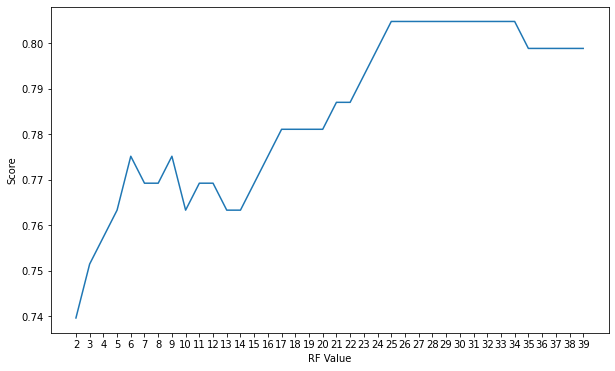

Random Forest Accuracy:  80.47%


In [116]:
from sklearn.ensemble import RandomForestClassifier

scoreListRF = []
for i in range(2,40):
    rf = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=i)
    rf.fit(X_train, y_train)
    scoreListRF.append(rf.score(X_val, y_val))

plt.figure(figsize=(10,6))
plt.plot(range(2,40), scoreListRF)
plt.xticks(np.arange(2,40,1))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()
RFAcc = max(scoreListRF)
print("Random Forest Accuracy:  {:.2f}%".format(RFAcc*100))

In [117]:
rf = RandomForestClassifier(random_state = 1, max_leaf_nodes=38)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_val)

print("done")

done


In [118]:
rf_mse = np.sqrt(metrics.mean_squared_error(rf_pred,y_val))
print("mean squared error:", rf_mse)

mean squared error: 0.42828956637154014


In [119]:
rf_rmse = np.sqrt(metrics.mean_squared_error(rf_pred, y_val, squared = False))
print("root mean squared error", rf_rmse)

root mean squared error 0.6544383594896773


In [120]:
rf_mae = mean_absolute_error(rf_pred, y_val)
print('mean absolute error:', rf_mae)

mean absolute error: 0.1834319526627219


In [121]:
rf_score = rf.score(X_val, y_val)
print('accuracy score:', rf_score)

accuracy score: 0.8165680473372781


In [122]:
print(classification_report(y_val, rf_pred))
print(confusion_matrix(y_val, rf_pred))


              precision    recall  f1-score   support

           0       0.95      0.67      0.79        86
           1       0.74      0.96      0.84        83

    accuracy                           0.82       169
   macro avg       0.85      0.82      0.81       169
weighted avg       0.85      0.82      0.81       169

[[58 28]
 [ 3 80]]


In [123]:
importance = rf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.11328
Feature: 1, Score: 0.08923
Feature: 2, Score: 0.10203
Feature: 3, Score: 0.03612
Feature: 4, Score: 0.38607
Feature: 5, Score: 0.00902
Feature: 6, Score: 0.00908
Feature: 7, Score: 0.01650
Feature: 8, Score: 0.01692
Feature: 9, Score: 0.01791
Feature: 10, Score: 0.01842
Feature: 11, Score: 0.01233
Feature: 12, Score: 0.01767
Feature: 13, Score: 0.01704
Feature: 14, Score: 0.01766
Feature: 15, Score: 0.01557
Feature: 16, Score: 0.01211
Feature: 17, Score: 0.03522
Feature: 18, Score: 0.04355
Feature: 19, Score: 0.01426


<AxesSubplot:title={'center':'Feature Importances'}>

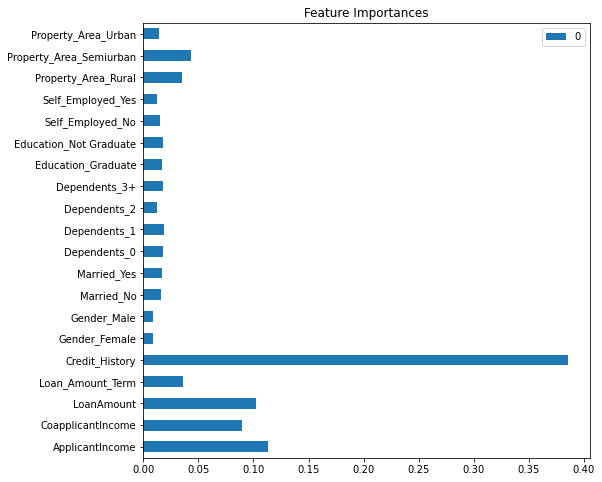

In [124]:
imp_plot = pd.DataFrame(rf.feature_importances_, index= df_train_onehot.drop(['Loan_Status'], axis=1).columns)

imp_plot.plot(kind='barh', title='Feature Importances', figsize = (8,8))

#### KNN Classifier

Text(0, 0.5, 'Error Rate')

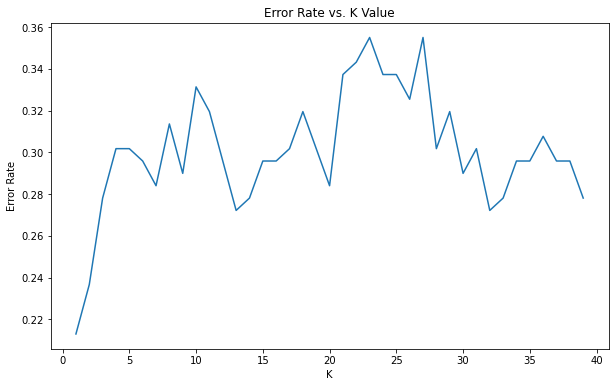

In [125]:
from sklearn.neighbors import KNeighborsClassifier 

error_rate = []
# Will take some time
for i in range(1,40):
    KNN = KNeighborsClassifier(n_neighbors = i)
    KNN.fit(X_train, y_train)
    KNN_pred = KNN.predict(X_val)
    error_rate.append(np.mean(KNN_pred != y_val))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

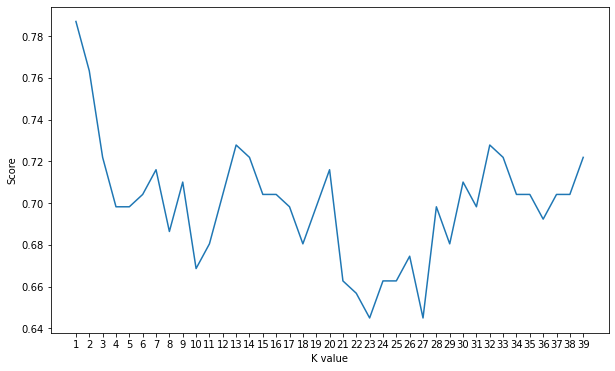

KNN best accuracy: 78.70%


In [126]:
scoreListknn = []
for i in range(1,40):
    KNclassifier = KNeighborsClassifier(n_neighbors = i)
    KNclassifier.fit(X_train, y_train)
    scoreListknn.append(KNclassifier.score(X_val, y_val))

plt.figure(figsize=(10,6))
plt.plot(range(1,40), scoreListknn)
plt.xticks(np.arange(1,40,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
KNAcc = max(scoreListknn)
print("KNN best accuracy: {:.2f}%".format(KNAcc*100))

In [127]:
KNN = KNeighborsClassifier(n_neighbors = 1)
KNN.fit(X_train, y_train)
KNN_pred = KNN.predict(X_val)

In [128]:
KNN_mse = np.sqrt(metrics.mean_squared_error(KNN_pred, y_val))
print("mean squared error:", KNN_mse)

mean squared error: 0.46153846153846156


In [129]:
KNN_mse = np.sqrt(metrics.mean_squared_error(KNN_pred, y_val, squared = False))
print("root mean squared error:", KNN_mse)

root mean squared error: 0.6793662204867574


In [130]:
KNN_mse = metrics.mean_absolute_error(KNN_pred,y_val)
print("mean absolute error:", KNN_mse)

mean absolute error: 0.21301775147928995


In [131]:
KNN_score = KNN.score(X_val, y_val)
print('Accuracy score:', KNN_score)

Accuracy score: 0.7869822485207101


In [132]:
print(classification_report(y_val, KNN_pred))
print(confusion_matrix(y_val, KNN_pred))


              precision    recall  f1-score   support

           0       0.80      0.77      0.79        86
           1       0.77      0.81      0.79        83

    accuracy                           0.79       169
   macro avg       0.79      0.79      0.79       169
weighted avg       0.79      0.79      0.79       169

[[66 20]
 [16 67]]


#### Gradient Boosting Classifier

In [133]:
from sklearn.ensemble import GradientBoostingClassifier
!pip install xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [134]:
params = {'n_estimators':[50,100,200,300,400,500,600,700,800],
      'max_depth':[1,2,3,4,5,6,7,8,9,10],
      'subsample':[0.5,1],
      'max_leaf_nodes':[2,5,10,20,30,40,50]}

GB = RandomizedSearchCV(GradientBoostingClassifier(), params, cv=20, random_state = 1)
GB.fit(X_train, y_train)

RandomizedSearchCV(cv=20, estimator=GradientBoostingClassifier(),
                   param_distributions={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'max_leaf_nodes': [2, 5, 10, 20, 30, 40,
                                                           50],
                                        'n_estimators': [50, 100, 200, 300, 400,
                                                         500, 600, 700, 800],
                                        'subsample': [0.5, 1]},
                   random_state=1)

In [135]:
print('Best estimator:', GB.best_estimator_)
print('Best score:', GB.best_score_)
print('Best params:', GB.best_params_)
print('Best index:', GB.best_index_)

Best estimator: GradientBoostingClassifier(max_depth=8, max_leaf_nodes=30, n_estimators=300,
                           subsample=0.5)
Best score: 0.8016042780748662
Best params: {'subsample': 0.5, 'n_estimators': 300, 'max_leaf_nodes': 30, 'max_depth': 8}
Best index: 6


In [139]:
GBclassifier = GradientBoostingClassifier(subsample=0.5, n_estimators=300, max_depth=8, max_leaf_nodes=30)
GBclassifier.fit(X_train, y_train)

y_pred = GBclassifier.predict(X_val)


In [140]:
print(classification_report(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))

from sklearn.metrics import accuracy_score
GB_score = accuracy_score(y_pred,y_val)
print('Gradient Boosting accuracy: {:.2f}%'.format(GB_score*100))

              precision    recall  f1-score   support

           0       0.83      0.73      0.78        86
           1       0.75      0.84      0.80        83

    accuracy                           0.79       169
   macro avg       0.79      0.79      0.79       169
weighted avg       0.79      0.79      0.79       169

[[63 23]
 [13 70]]
Gradient Boosting accuracy: 78.70%


In [141]:
df_accuracy = pd.DataFrame({'Model': ['Logistic Regression', 'Decision Tree Classifier', 
                                  'Random Forest Classifier', 
                                  'K Nearest Neighbours Classifier', 'Gradient Boosting Classifier'], 
                        'Accuracy': [LR_score*100, dt_score*100, rf_score*100, KNN_score*100, GB_score*100]})
df_accuracy.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
2,Random Forest Classifier,81.656805
3,K Nearest Neighbours Classifier,78.698225
4,Gradient Boosting Classifier,78.698225
1,Decision Tree Classifier,77.514793
0,Logistic Regression,72.781065


## 6. Conclusion

The initial problem is a fairly straightforward one; we want to predict the binary category "Loan Status" using the other customer information in the dataset. However, after examining the data, we can see that there are a number of steps we must take before we can train any models. 

When visualizing the relationships between variables, it became apparent that certain classes had significantly more representation in the data than others (for example, male vs female applicants) and therefore normalizing the data would provide a more complete picture than only looking at the value counts.

Furthermore, the numerical variables 'Applicant Income', 'Coapplicant Income', and 'Loan Amount' show a lot of skew and outlying datapoints when visualized in boxplots and distribution plots. Transformations were performed on this data to make the distribution more normal. I performed some iterations in which I limited the range of data to remove outliers before performing transformations, resulting in consistently worse model accuracy. Next, as there was a fairly substantial disparity in the count of the two classes of the target variable, I used 'SMOTE' to simulate data and equalize the outcomes of the target variable to produce better-fit models. Again, I performed several iterations without using 'SMOTE' and the accuracy of all of the models was consistently worse. 

Finally after training a number of different classification models and comparing their accuracy scores, all of the models were able to make predictions with better than 70% accuracy, but the Random Forest model was the best, achieving over 80% accuracy.